# Neural Networks

This notebook shall be based off the following text: \
https://www.youtube.com/watch?v=pauPCy_s0Ok&t=1067s&ab_channel=TheIndependentCode

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist # type: ignore

2024-05-15 04:12:18.955253: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 04:12:19.220788: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 04:12:20.112207: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 04:12:22.292064: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Layers

<center>
    <img src="./Assets/Layers.png" height=150px></img>
</center>  

Each Layer will take in an input and return an output.  Each output will then be used as the input for the next layer and etc.

Each Layer will be of 2 categories: A Dense Layer and an Activation Layer.

## Forward Propagation

The Initial Input will be passed through the Dense Layer and the output will be given to the Activation Layer to then give to the next Dense Layer and so forth.

<center>
    <img src="./Assets/Forward.png" height=150px></img>
</center>  

### Dense Layer

The Dense Layer will take in an input and return an output.  The Dense Layer will also have its own Weights and Biases, which will be used in Forward Propagation to calculate the Output:

$$
Y = W \times X + B = 
\begin{bmatrix}
y_0 = w_{0,0} x_0 + w_{0,1} x_1 + \cdots + w_{0,i} x_i + b_{0} \\
y_1 = w_{1,0} x_0 + w_{1,1} x_1 + \cdots + w_{1,i} x_i + b_{1} \\
\vdots \\
y_j = w_{j,0} x_0 + w_{j,1} x_1 + \cdots + w_{j,i} x_i + b_{j} \\
\end{bmatrix}
$$

### Activation Layer

The Activation Layer will take in an input and return an output.  The Activation Layer will NOT have its own Weights and Biases.  We will simply use the Input and an Activation Function, $f$, for the Forward Propagation:

$$
Y = f(X) = \begin{bmatrix}
y_0 = f(x_0) \\
y_1 = f(x_1) \\
\vdots \\
y_j = f(x_j)
\end{bmatrix}
$$

## Backward Propagation

The Initial Input will be passed through the Last Activation Layer and the output will be given to the previous Dense Layer to then give to the previous Activation Layer and so forth.

<center>
    <img src="./Assets/Backward.png" height=150px></img>
</center>  

### Activation Layer

The Activation Layer will take in the derivative of the Error Function in respect to the Output given from the Forward Propagation function. It will output the derivative of the Error Function in respect to the Input given from the Forward Propagation function to then give to the previous layer before it.

$$
\frac{\partial E}{\partial X} = \frac{\partial E}{\partial Y}\frac{\partial Y}{\partial X}
$$

From the Forward Propagation: we get the Following:

$$
Y = f(X) = \begin{bmatrix}
y_0 = f(x_0) \\
y_1 = f(x_1) \\
\vdots \\
y_j = f(x_j)
\end{bmatrix}
$$

Thus gets us the following:

$$
\frac{\partial E}{\partial X} = 
\begin{bmatrix}
\frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial x_0} +  \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_0} + \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial x_0} \\
\frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial x_1} +  \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_1} + \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial x_1} \\
\vdots \\
\frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial x_2} +  \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_2} + \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial x_2} \\
\end{bmatrix} =
\begin{bmatrix}
\frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial x_0} \\
\frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_1} \\
\vdots \\
\frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial x_2} \\
\end{bmatrix} =
\begin{bmatrix}
\frac{\partial E}{\partial y_0} f'(x_0) \\
\frac{\partial E}{\partial y_1} f'(x_1) \\
\vdots \\
\frac{\partial E}{\partial y_j} f'(x_j)
\end{bmatrix} = 
\frac{\partial E}{\partial Y} \odot f'(X)
$$

From here, we do NOT update the Weights and Biases, because the Weights and Biases are not at this Layer

### Dense Layer

The Dense Layer will take in the derivative of the Error Function in respect to the Output given from the Forward Propagation function. It will output the derivative of the Error Function in respect to the Input given from the Forward Propagation function to then give to the previous layer before it.

$$
\frac{\partial E}{\partial X} = \frac{\partial E}{\partial Y}\frac{\partial Y}{\partial X}
$$

From the Forward Propagation: we get the Following:

$$
Y = W \times X + B = 
\begin{bmatrix}
y_0 = w_{0,0} x_0 + w_{0,1} x_1 + \cdots + w_{0,i} x_i + b_{0} \\
y_1 = w_{1,0} x_0 + w_{1,1} x_1 + \cdots + w_{1,i} x_i + b_{1} \\
\vdots \\
y_j = w_{j,0} x_0 + w_{j,1} x_1 + \cdots + w_{j,i} x_i + b_{j} \\
\end{bmatrix}
$$

Thus gets us the following:

$$
\frac{\partial E}{\partial X} = 
\begin{bmatrix}
\frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial x_0} +  \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_0} + \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial x_0} \\
\frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial x_1} +  \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_1} + \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial x_1} \\
\vdots \\
\frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial x_i} +  \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_i} + \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial x_i} \\
\end{bmatrix} = 
\begin{bmatrix}
\frac{\partial E}{\partial y_0} w_{0,0} +  \frac{\partial E}{\partial y_1} w_{1,0} + \cdots + \frac{\partial E}{\partial y_j} w_{j,0} \\
\frac{\partial E}{\partial y_0} w_{0,1} +  \frac{\partial E}{\partial y_1} w_{1,1} + \cdots + \frac{\partial E}{\partial y_j} w_{j,1} \\
\vdots \\
\frac{\partial E}{\partial y_0} w_{0,i} +  \frac{\partial E}{\partial y_1} w_{1,i} + \cdots + \frac{\partial E}{\partial y_j} w_{j,i} \\
\end{bmatrix} =
W^{T} \times \frac{\partial E}{\partial Y}
$$

From here, we can find the derivative of the Error Function in respect to the Weights and Biases:

$$
\frac{\partial E}{\partial W} = \frac{\partial E}{\partial Y}\frac{\partial Y}{\partial W} = 
\begin{bmatrix}
\frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial w_{0,0}} & \frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial w_{0,1}} & \cdots & \frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial w_{0,i}} \\
\frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial w_{1,0}} & \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial w_{1,1}} & \cdots & \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial w_{1,i}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial w_{j,0}} & \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial w_{j,1}} & \cdots & \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial w_{j,i}} \\
\end{bmatrix} = 
\begin{bmatrix}
\frac{\partial E}{\partial y_0} x_{0} & \frac{\partial E}{\partial y_0} x_{1} & \cdots & \frac{\partial E}{\partial y_0} x_{i} \\
\frac{\partial E}{\partial y_1} x_{0} & \frac{\partial E}{\partial y_1} x_{1} & \cdots & \frac{\partial E}{\partial y_1} x_{i} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial E}{\partial y_j} x_{0} & \frac{\partial E}{\partial y_j} x_{1} & \cdots & \frac{\partial E}{\partial y_j} x_{i} \\
\end{bmatrix} =
\frac{\partial E}{\partial Y} \times X^{T} \\
\frac{\partial E}{\partial B} = \frac{\partial E}{\partial Y}\frac{\partial Y}{\partial B} = 
\begin{bmatrix}
\frac{\partial E}{\partial y_0} \frac{\partial y_0}{\partial b_{0}} \\
\frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial b_{1}} \\
\vdots \\
\frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial b_{j}} \\
\end{bmatrix} = 
\begin{bmatrix}
\frac{\partial E}{\partial y_0} \\
\frac{\partial E}{\partial y_1} \\
\vdots \\
\frac{\partial E}{\partial y_j} \\
\end{bmatrix} =
\frac{\partial E}{\partial Y}
$$

## Functions and Their Derivatives

We will now calculate the Error Function, the Activation Function, and their derivatives

### Error Function

Given our Predicted Output, $Y$ and the Desired Output $Y^*$, we can calculate the Error using the Mean Square Error Function:

$$
E = MSE = \frac{1}{j} \sum\limits_{n = 0}^{j} (y_n - y_n^*)^2
$$

Now we can calculate the derivative of the Error Function in respect to the Output, $Y$:

$$
\frac{\partial E}{\partial Y} = \begin{bmatrix}
\frac{\partial E}{\partial y_0} \\
\frac{\partial E}{\partial y_1} \\
\vdots \\
\frac{\partial E}{\partial y_j} \\
\end{bmatrix} = 
\begin{bmatrix}
\frac{2(y_0 - y_0^*)}{j} \\
\frac{2(y_1 - y_1^*)}{j} \\
\vdots \\
\frac{2(y_j - y_j^*)}{j} \\
\end{bmatrix} = 
\frac{2}{j}\big(Y - Y^*\big)
$$

In [2]:
def MSE(y_pred, y_true):
    return np.mean(np.power(y_pred - y_true, 2))

def MSE_prime(y_pred, y_true):
    return (2 / np.size(y_pred)) * (y_pred - y_true)

### Activation Functions

We have 2 Activation Functions:

#### Sigmoid Function:

$$
Y = \sigma(X) = \frac{1}{1 + e^{-X}} \qquad \frac{\partial Y}{\partial X} = \sigma'(X) = \sigma(X)(1 - \sigma(X))
$$

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

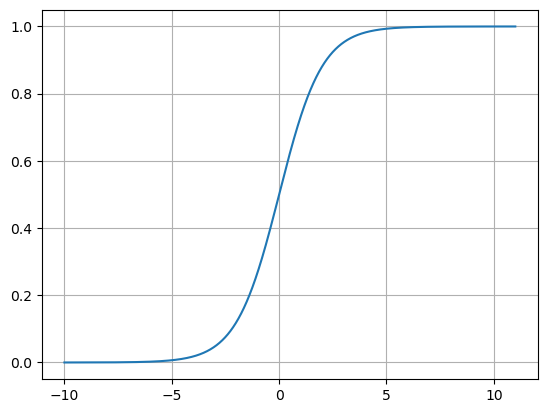

In [4]:
x_vals = np.arange(-10, 11, 1e-3)
y_vals = [sigmoid(x) for x in x_vals]

plt.grid()
plt.plot(x_vals, y_vals)

#### Tanh Function

$$
Y = \tanh(X) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} \qquad \frac{\partial Y}{\partial X} = \tanh'(X) = 1 - \tanh^2(X)
$$

In [5]:
def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - tanh(x) ** 2

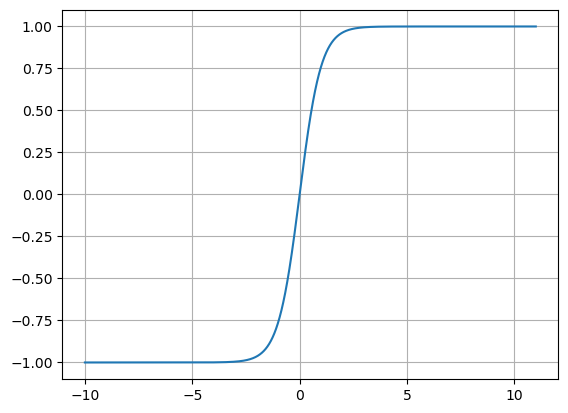

In [6]:
x_vals = np.arange(-10, 11, 1e-3)
y_vals = [tanh(x) for x in x_vals]

plt.grid()
plt.plot(x_vals, y_vals)

## Putting it All Together

In [7]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_prop(self, input):
        return

    def backward_prop(self, output_gradient, learning_rate):
        return

In [8]:
class Dense(Layer):
    def __init__(self, input_height, output_height):
        self.weights = np.random.randn(output_height, input_height)
        self.biases = np.random.randn(output_height, 1)

    def forward_prop(self, input):
        self.input = input
        return np.matmul(self.weights, self.input) + self.biases

    def backward_prop(self, output_gradient, learning_rate):
        weights_gradient = np.matmul(output_gradient, self.input.T)
        biases_gradient = output_gradient
        self.weights -= learning_rate * weights_gradient
        self.biases -= learning_rate * biases_gradient
        return np.matmul(self.weights.T, output_gradient)

In [9]:
class Activation(Layer):
    def __init__(self, activation_func, activation_prime_func):
        self.activation_func = activation_func
        self.activation_prime_func = activation_prime_func

    def forward_prop(self, input):
        self.input = input
        return self.activation_func(self.input)

    def backward_prop(self, output_gradient, learning_rate):
        return output_gradient * self.activation_prime_func(self.input)

In [10]:
class Tanh(Activation):
    def __init__(self):
        super().__init__(tanh, tanh_prime)

In [11]:
class Sigmoid(Activation):
    def __init__(self):
        super().__init__(sigmoid, sigmoid_prime)

## MNIST Number Recognition Test

In [12]:
def convertInput(input):
    return input.reshape(-1,1)

In [13]:
def convertAnswer(answer):
    y = np.zeros((10, 1))
    y[answer] = 1
    return y

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
def train(x_train_vals, y_train_vals, network, epochs = 1000, learning_rate = 0.01):
    error_arr = []

    for e in range(epochs + 1):
        error = 0
        for x, y in zip(x_train_vals, y_train_vals):

            # Set the Inputs of Each Layer
            output = x
            for layer in network:
                output = layer.forward_prop(output)

            # Find Error
            error += MSE(output, y)

            grad = MSE_prime(output, y)
            for layer in reversed(network):
                grad = layer.backward_prop(grad, learning_rate)

        error /= len(x_train_vals)
        error_arr.append(error)
        print('Progress: {0:0.2f}% => Error: {1:0.4f}'.format(100 * e / epochs, error), end='\r')

    plt.grid()
    plt.plot(error_arr)

    return error


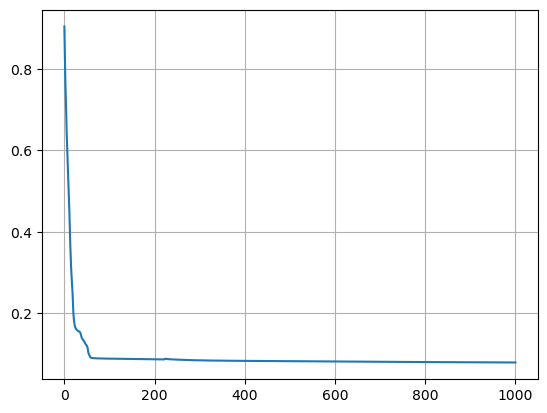

In [16]:
x_train_vals = [convertInput(x) for x in X_train[0:1000]]
y_train_vals = [convertAnswer(y) for y in y_train[0:1000]]

network = [
    Dense(x_train_vals[0].size, 16),
    Tanh(),
    Dense(16, 16),
    Tanh(),
    Dense(16, 10),
    Tanh()
]

error = train(x_train_vals, y_train_vals, network)

In [17]:
def saveWB():
    for i in range(0, len(network), 2):
        with open('Weights/W_' + str(i) + '.csv', 'w+') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerows(network[i].weights)
        with open('Biases/B_' + str(i) + '.csv', 'w+') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerows(network[i].biases)
    return "Saved!"

if error <= 0.08:
    print(saveWB())

Saved!


In [18]:
test_index = np.random.randint(100)
x = X_train[test_index].reshape(-1, 1)
y = convertAnswer(y_train[test_index])

output = convertInput(x)
for layer in network:
    output = layer.forward_prop(output)

print("y*: ", y.T)
print("y: ", output.T)

y*:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
y:  [[ 0.07855837  0.21565012  0.00807605  0.08752652 -0.05580759  0.12288397
   0.04578923  0.29602785 -0.00680694  0.01414969]]


### Attempt at Generic Test Data (2 Hidden Layers)

In [19]:
# Indicates Number of Ones from Input by placing 1 on that index value
def convertAnswer_2(x):
    y = np.zeros((len(x) + 1, 1))
    y[x.sum()] = 1
    return y

0.1695322747344633

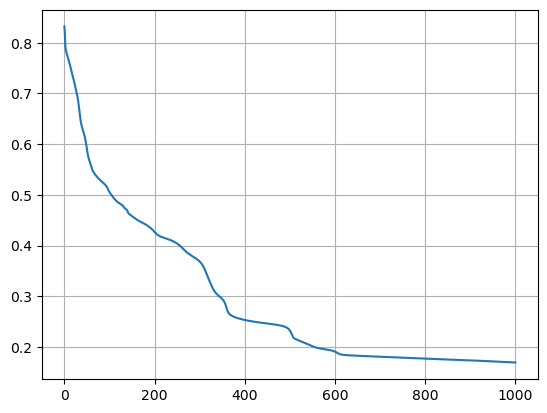

In [20]:
x_train_vals_2 = [np.random.randint(2, size=5).reshape(-1,1) for _ in range(31)]
y_train_vals_2 = [convertAnswer_2(x) for x in x_train_vals_2]

network_2 = [
    Dense(x_train_vals_2[0].size, 16),
    Tanh(),
    Dense(16, 16),
    Tanh(),
    Dense(16, x_train_vals_2[0].size + 1),
    Tanh()
]

train(x_train_vals_2, y_train_vals_2, network_2)

In [23]:
x_2 = np.random.randint(2, size=5).reshape(-1,1)
y_2 = convertAnswer_2(x_2)

output_2 = x_2
for layer in network_2:
    output_2 = layer.forward_prop(output_2)

print("y*: ", y_2.T)
print("y: ", output_2.T)

y*:  [[0. 0. 0. 1. 0. 0.]]
y:  [[-0.04982118 -0.01021586  0.01798749  0.99999978  0.02761133 -0.96434928]]
